<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week9/Ridge_Lasso_Geometrical_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometric Interpretation of Ridge and Lasso Regression with Two Covariates

In this notebook, we derive and illustrate the geometric interpretation of Ridge and Lasso regression using two covariates. We show how the RSS (Residual Sum of Squares) contours interact with the constraints of Ridge (using an $L_2$ penalty) and Lasso (using an $L_1$ penalty).

---

## 1. Deriving the RSS Contour Equation

### 1.1 The RSS Function

For a linear model with two covariates,
$$
y = X \beta + \varepsilon, \quad \beta = (\beta_1, \beta_2),
$$
the residual sum of squares (RSS) is given by
$$
\mathrm{RSS}(\beta) = \|y - X\beta\|^2.
$$
The ordinary least squares (OLS) solution, $\hat{\beta}$, minimizes this function.

### 1.2 Taylor Expansion Around $\hat{\beta}$

Since $\hat{\beta}$ minimizes the RSS, we can approximate the function near $\hat{\beta}$ by a second-order Taylor expansion:
$$
\mathrm{RSS}(\beta) \approx \mathrm{RSS}(\hat{\beta}) + \frac{1}{2} (\beta-\hat{\beta})^T H (\beta-\hat{\beta}),
$$
where $H$ is the Hessian matrix of the RSS with respect to $\beta$.

### 1.3 The Hessian and a Simplifying Assumption

For our RSS,
$$
\mathrm{RSS}(\beta) = (y - X\beta)^T (y - X\beta),
$$
the Hessian is
$$
H = 2X^TX.
$$
If we assume that $X^TX = I$ (or transform the problem appropriately), then
$$
H = 2I.
$$
Thus, near $\hat{\beta}$ the RSS can be written (ignoring the constant $\mathrm{RSS}(\hat{\beta})$ as
$$
(\beta - \hat{\beta})^T (\beta - \hat{\beta}) = (\beta_1 - \hat{\beta}_1)^2 + (\beta_2 - \hat{\beta}_2)^2.
$$

### 1.4 The Contour Equation

The level sets (contours) of the RSS are defined by
$$
\mathrm{RSS}(\beta) = \mathrm{RSS}(\hat{\beta}) + c,
$$
so that
$$
(\beta_1 - \hat{\beta}_1)^2 + (\beta_2 - \hat{\beta}_2)^2 = c.
$$
This is the equation of a circle centered at $\hat{\beta}$ with radius $\sqrt{c}$.

---

## 2. Constraint Sets for Ridge and Lasso

### Ridge Regression Constraint

Ridge regression uses an $L_2$ penalty. Viewed as a constraint, we have
$$
\beta_1^2 + \beta_2^2 \le t.
$$
The boundary is given by
$$
\beta_1^2 + \beta_2^2 = t,
$$
which is a circle centered at the origin with radius $\sqrt{t}$.

### Lasso Regression Constraint

Lasso regression uses an $L_1$ penalty. Viewed as a constraint, we have
$$
|\beta_1| + |\beta_2| \le t.
$$
The boundary is given by
$$
|\beta_1| + |\beta_2| = t,
$$
which forms a diamond (rotated square) with vertices at $(t, 0), (0, t), (-t, 0)$, and $(0, -t)$.

---

## 3. Geometric Optimality: Where the RSS Contours Meet the Constraints

### Ridge (Smooth Projection)

If the unconstrained optimum $\hat{\beta}$ lies outside the feasible region, the Ridge solution is the projection of $\hat{\beta}$ onto the $L_2$ ball. In our geometry, this corresponds to the RSS contour (a circle centered at $\hat{\beta}$ being tangent to the constraint circle. The gradients of the RSS and the constraint are parallel at the tangent point.

### Lasso (Corner Solution)

For Lasso, when $\hat{\beta}$ is outside the $L_1$ ball (diamond), the optimal solution is the point on the diamond that minimizes the Euclidean distance to $\hat{\beta}$. Due to the sharp corners of the diamond, this projection often occurs exactly at a vertex. At a vertex, one coefficient becomes zero, which is the mechanism through which Lasso produces sparse solutions.

To emphasize this effect, we choose an unconstrained optimum such that the projection lands at one of the diamond’s corners. For example, if we set
$$
\hat{\beta} = (0.2,\, 1.2),
$$
its $L_1$ norm is $0.2 + 1.2 = 1.4$, which is larger than our chosen $t = 1$ for the $L_1$ ball. When we project $\hat{\beta}$ onto the diamond $|\beta_1| + |\beta_2| = 1$, the optimal solution turns out to be $(0,1)$ — a corner — clearly showing that Lasso can force one coefficient to zero.

---

## 4. Python Implementation

Below is the complete Python code that implements the above ideas. The code plots:

- The unconstrained optimum $\hat{\beta}$.
- Several RSS contours (circles centered at $\hat{\beta}$).
- The Ridge constraint (a circle).
- The Lasso constraint (a diamond).
- The optimal solutions for Ridge (projection onto the circle) and Lasso (projection onto the diamond, landing at a corner).


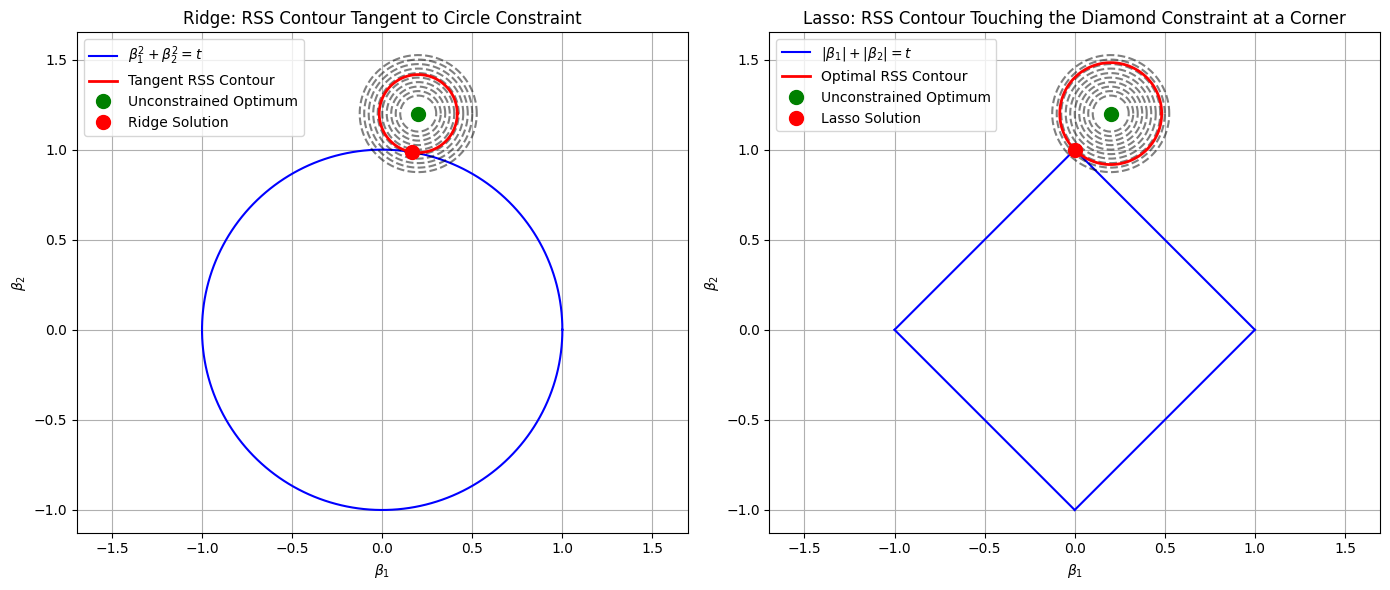

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Step 1. Set up the unconstrained optimum and RSS contours.
# ------------------------------

# Choose the unconstrained OLS optimum so that the lasso projection lands on a corner.
beta_hat = np.array([0.2, 1.2])  # L1 norm = 1.4, outside the L1 ball of radius 1

# The RSS function (locally) is approximated by:
# (beta1 - beta_hat1)^2 + (beta2 - beta_hat2)^2 = c.
# We will plot several contours (circles) centered at beta_hat.

# ------------------------------
# Step 2. Define the constraint sets.
# ------------------------------

# For Ridge: constraint is beta1^2 + beta2^2 <= t.
t_ridge = 1.0  # Set t for ridge; the boundary is a circle of radius sqrt(t_ridge)=1.
theta = np.linspace(0, 2*np.pi, 200)
ridge_x = np.sqrt(t_ridge) * np.cos(theta)
ridge_y = np.sqrt(t_ridge) * np.sin(theta)

# For Lasso: constraint is |beta1| + |beta2| <= t.
t_lasso = 1.0  # Set t for lasso; the diamond will have vertices at (1,0), (0,1), (-1,0), (0,-1).

# Construct the diamond by splitting into four segments:
# First quadrant: beta1 + beta2 = t, beta1 in [0, t]
diamond1_beta1 = np.linspace(0, t_lasso, 100)
diamond1_beta2 = t_lasso - diamond1_beta1
# Second quadrant: -beta1 + beta2 = t, beta1 in [-t, 0]
diamond2_beta1 = np.linspace(-t_lasso, 0, 100)
diamond2_beta2 = t_lasso + diamond2_beta1  # since beta1 is negative here
# Third quadrant: -beta1 - beta2 = t, beta1 in [-t, 0]
diamond3_beta1 = np.linspace(-t_lasso, 0, 100)
diamond3_beta2 = -t_lasso - diamond3_beta1
# Fourth quadrant: beta1 - beta2 = t, beta1 in [0, t]
diamond4_beta1 = np.linspace(0, t_lasso, 100)
diamond4_beta2 = diamond4_beta1 - t_lasso

# ------------------------------
# Step 3. Find the point where the RSS contour touches the constraint.
# ------------------------------

# The RSS contour is:
# (beta1 - beta_hat1)^2 + (beta2 - beta_hat2)^2 = c.
# We want the smallest c for which the contour touches the constraint.

# --- For Ridge ---
# The ridge solution is the projection of beta_hat onto the circle (L2 ball).
norm_beta_hat = np.linalg.norm(beta_hat)
ridge_solution = beta_hat * (np.sqrt(t_ridge) / norm_beta_hat)
# The RSS value at this solution:
c_ridge = np.sum((ridge_solution - beta_hat)**2)

# --- For Lasso ---
# We find the point on the diamond (|beta1|+|beta2| = t_lasso) that minimizes the Euclidean distance to beta_hat.
diamond_points_beta1 = np.concatenate([diamond1_beta1, diamond2_beta1,
                                         diamond3_beta1, diamond4_beta1])
diamond_points_beta2 = np.concatenate([diamond1_beta2, diamond2_beta2,
                                         diamond3_beta2, diamond4_beta2])
# Compute squared distances from beta_hat:
distances = (diamond_points_beta1 - beta_hat[0])**2 + (diamond_points_beta2 - beta_hat[1])**2
min_idx = np.argmin(distances)
lasso_solution = np.array([diamond_points_beta1[min_idx], diamond_points_beta2[min_idx]])
c_lasso = distances[min_idx]
# For our chosen beta_hat and t_lasso=1, this projection lands at (0,1), a corner of the diamond.

# ------------------------------
# Step 4. Plot everything.
# ------------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Ridge Plot ---
axs[0].set_title('Ridge: RSS Contour Tangent to Circle Constraint')
axs[0].set_xlabel(r'$\beta_1$')
axs[0].set_ylabel(r'$\beta_2$')
axs[0].grid(True)
axs[0].axis('equal')

# Plot the ridge constraint (circle)
axs[0].plot(ridge_x, ridge_y, 'b-', label=r'$\beta_1^2+\beta_2^2=t$')

# Plot several RSS contours (circles centered at beta_hat)
radii = np.linspace(0.1, np.sqrt(c_ridge)*1.5, 10)
theta_contour = np.linspace(0, 2*np.pi, 200)
for r in radii:
    contour_x = beta_hat[0] + r * np.cos(theta_contour)
    contour_y = beta_hat[1] + r * np.sin(theta_contour)
    axs[0].plot(contour_x, contour_y, 'k--', alpha=0.5)

# Highlight the tangent RSS contour (with radius sqrt(c_ridge))
tangent_radius = np.sqrt(c_ridge)
contour_x = beta_hat[0] + tangent_radius * np.cos(theta_contour)
contour_y = beta_hat[1] + tangent_radius * np.sin(theta_contour)
axs[0].plot(contour_x, contour_y, 'r-', linewidth=2, label='Tangent RSS Contour')

# Mark the unconstrained optimum and ridge solution
axs[0].plot(beta_hat[0], beta_hat[1], 'go', markersize=10, label='Unconstrained Optimum')
axs[0].plot(ridge_solution[0], ridge_solution[1], 'ro', markersize=10, label='Ridge Solution')

# --- Lasso Plot ---
axs[1].set_title('Lasso: RSS Contour Touching the Diamond Constraint at a Corner')
axs[1].set_xlabel(r'$\beta_1$')
axs[1].set_ylabel(r'$\beta_2$')
axs[1].grid(True)
axs[1].axis('equal')

# Plot the lasso constraint (diamond)
axs[1].plot(diamond1_beta1, diamond1_beta2, 'b-')
axs[1].plot(diamond2_beta1, diamond2_beta2, 'b-')
axs[1].plot(diamond3_beta1, diamond3_beta2, 'b-')
axs[1].plot(diamond4_beta1, diamond4_beta2, 'b-', label=r'$|\beta_1|+|\beta_2|=t$')

# Plot several RSS contours (circles centered at beta_hat)
for r in radii:
    contour_x = beta_hat[0] + r * np.cos(theta_contour)
    contour_y = beta_hat[1] + r * np.sin(theta_contour)
    axs[1].plot(contour_x, contour_y, 'k--', alpha=0.5)

# Highlight the optimal RSS contour (with radius sqrt(c_lasso))
lasso_radius = np.sqrt(c_lasso)
contour_x = beta_hat[0] + lasso_radius * np.cos(theta_contour)
contour_y = beta_hat[1] + lasso_radius * np.sin(theta_contour)
axs[1].plot(contour_x, contour_y, 'r-', linewidth=2, label='Optimal RSS Contour')

# Mark the unconstrained optimum and lasso solution
axs[1].plot(beta_hat[0], beta_hat[1], 'go', markersize=10, label='Unconstrained Optimum')
axs[1].plot(lasso_solution[0], lasso_solution[1], 'ro', markersize=10, label='Lasso Solution')

axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
